# word score 

In [32]:
from openai import OpenAI

client = OpenAI(
  
)


def get_completion(prompt, model="gpt-3.5-turbo", temperature=0):
    messages = [{"role": "user", "content": prompt}]
    response = client.chat.completions.create(
        model=model,
        messages=messages,
        temperature=0
    )
    return response.choices[0].message.content

# To get environment variables
import os

# Make the display a bit wider
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

# To split our transcript into pieces
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [33]:
import os

result_summ = []
score_eve = []

folder_path = '/Users/guangyaoqin/Desktop/Applied_project/proj/transcripts'

# Get a list of all text files in the directory
text_files = [filename for filename in os.listdir(folder_path) if filename.endswith('.txt')]

# Sort the list of text files numerically based on the numeric part of their filenames
text_files.sort(key=lambda x: int(x.split('_')[0]))  # Split filename and convert the numeric part to integer for sorting

# Initialize the primary key counter
primary_key = 1

# Loop through sorted text files
for filename in text_files:
    # Create the full path to the file
    file_path = os.path.join(folder_path, filename)
    
    # Open and read the contents of the text file
    with open(file_path, 'r') as file:
        content = file.read()
    
    # Process the contents of the text file as needed
    # For example, you could print the contents
    print(f"Contents of {filename}:")
    
    text_splitter = RecursiveCharacterTextSplitter(separators=["\n\n", "\n"], chunk_size=2000, chunk_overlap=250)
    texts = text_splitter.create_documents([content])

    prompt = """
    You are a helpful assistant that helps recent NYU graduate students, a rep at Paradigm Shift,
    summarizing insights from an interview concerning new funding models for museums, 
    the significance of museums seeking alternative funding sources, and delving into concepts like fractional ownership of art. 
    Your goal is to generate 20 sentiment words of the interview from the perspective of recent NYU graduate students that will highlight key points that will be relevant to making a sale. 
    Based on these 20 words, assign values, if the word is positive, give it value 1, neutral as 0, negative as -1. Output as a Json file, like { "good":1, "fair":0, "bad":-1}.
    Do not respond with anything outside of the call transcript. If you don't know, say, "I don't know"
    """
    response = get_completion(prompt)
    # Append the sentiment words along with the primary key to score_eve
    score_eve.append({"primary_key": primary_key, "sentiment_words": response})
    
    # Increment the primary key for the next row
    primary_key += 1
    
    print(response)


Contents of 1_Dr. Odo - NYU Research Project Transcript copy.txt:
{
    "insights": {
        "innovative": 1,
        "exciting": 1,
        "forward-thinking": 1,
        "progressive": 1,
        "creative": 1,
        "promising": 1,
        "beneficial": 1,
        "opportunity": 1,
        "revolutionary": 1,
        "inspiring": 1,
        "interesting": 1,
        "valuable": 1,
        "challenging": -1,
        "controversial": -1,
        "risky": -1,
        "uncertain": -1,
        "questionable": -1,
        "concerning": -1,
        "doubtful": -1,
        "ambiguous": -1
    }
}
Contents of 2_NYU Project - Alternative Funding Model_ Transcript.txt:
{
    "insights": {
        "innovative": 1,
        "exciting": 1,
        "forward-thinking": 1,
        "progressive": 1,
        "creative": 1,
        "revolutionary": 1,
        "promising": 1,
        "beneficial": 1,
        "inspiring": 1,
        "transformative": 1,
        "challenging": -1,
        "controversial

{
    "insights": {
        "innovative": 1,
        "exciting": 1,
        "forward-thinking": 1,
        "progressive": 1,
        "creative": 1,
        "unique": 1,
        "challenging": -1,
        "controversial": -1,
        "provocative": -1,
        "disruptive": -1,
        "unconventional": -1,
        "experimental": 1,
        "groundbreaking": 1,
        "revolutionary": 1,
        "unorthodox": -1,
        "unprecedented": 1,
        "bold": 1,
        "dynamic": 1,
        "visionary": 1,
        "inspiring": 1,
        "transformative": 1
    }
}
Contents of 16_NYU Project - Alternative Funding Model_ Transcript.txt:
{
    "insights": {
        "innovative": 1,
        "exciting": 1,
        "forward-thinking": 1,
        "progressive": 1,
        "creative": 1,
        "promising": 1,
        "revolutionary": 1,
        "beneficial": 1,
        "inspiring": 1,
        "transformative": 1,
        "intriguing": 1,
        "positive": 1,
        "opportunities": 1,
   

In [34]:
import json
# Initialize a dictionary to store the sum of insight scores for each primary key
sum_scores = {}
scores_list = []

# Loop through each entry in score_eve
for entry in score_eve:
    # Check if the 'insights' key exists in the sentiment_words dictionary
    if 'insights' in entry['sentiment_words']:
        # Parse the sentiment_words JSON string to a dictionary
        sentiment_dict = json.loads(entry['sentiment_words'])
        # Extract the 'insights' dictionary from the sentiment_words dictionary
        insights_dict = sentiment_dict['insights']
        # Calculate the sum of insight scores
        sum_score = sum(insights_dict.values())
        # Store the sum of scores for the current primary key
        sum_scores[entry['primary_key']] = sum_score
    else:
        # Parse the sentiment_words JSON string to a dictionary
        sentiment_dict = json.loads(entry['sentiment_words'])
        # Calculate the sum of scores for the current primary key
        sum_score = sum(sentiment_dict.values())
        # Store the sum of scores for the current primary key
        sum_scores[entry['primary_key']] = sum_score

# Print the sum of insight scores for each primary key
print("Sum of Insight Scores:")
for primary_key, sum_score in sum_scores.items():
    scores_list.append(sum_score)
    print(f"Primary Key: {primary_key}, Sum of Scores: {sum_score}")


Sum of Insight Scores:
Primary Key: 1, Sum of Scores: 4
Primary Key: 2, Sum of Scores: 2
Primary Key: 3, Sum of Scores: 9
Primary Key: 4, Sum of Scores: 19
Primary Key: 5, Sum of Scores: 4
Primary Key: 6, Sum of Scores: 19
Primary Key: 7, Sum of Scores: 20
Primary Key: 8, Sum of Scores: 20
Primary Key: 9, Sum of Scores: 0
Primary Key: 10, Sum of Scores: 0
Primary Key: 11, Sum of Scores: 0
Primary Key: 12, Sum of Scores: 20
Primary Key: 13, Sum of Scores: 0
Primary Key: 14, Sum of Scores: 19
Primary Key: 15, Sum of Scores: 9
Primary Key: 16, Sum of Scores: 20
Primary Key: 17, Sum of Scores: 0
Primary Key: 18, Sum of Scores: 1
Primary Key: 19, Sum of Scores: 0
Primary Key: 20, Sum of Scores: 19
Primary Key: 21, Sum of Scores: 18
Primary Key: 22, Sum of Scores: 20
Primary Key: 23, Sum of Scores: 20


In [35]:
# score_eve #Json, whihc has pk and words with scores

# sum_scores #the sum of score for every candidates

# Plot 

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import cohen_kappa_score



In [44]:
# pip install textblob

In [98]:
# # testing
# from textblob import TextBlob

# # Enter the text you want to analyze
# text = "[Your text goes here.]"

# # Create a TextBlob object
# blob = TextBlob(text)

# # Sentiment analysis
# sentiment = blob.sentiment

# # Print the sentiment scores
# print("Sentiment Polarity:", sentiment.polarity)
# print("Sentiment Subjectivity:", sentiment.subjectivity)

# # Interpret the sentiment
# if sentiment.polarity > 0:
#     print("Overall sentiment is Positive")
# elif sentiment.polarity < 0:
#     print("Overall sentiment is Negative")
# else:
#     print("Overall sentiment is Neutral")


In [99]:
# import os
# import matplotlib.pyplot as plt
# import numpy as np
# from textblob import TextBlob

# # Define the directory containing the text files
# folder_path = '/Users/guangyaoqin/Desktop/Applied_project/proj/transcripts'

# # Get a list of all text files in the directory
# text_files = [filename for filename in os.listdir(folder_path) if filename.endswith('.txt')]

# # Sort the list of text files numerically based on the numeric part of their filenames
# text_files.sort(key=lambda x: int(x.split('_')[0]))

# # Lists to store sentiment polarity and file names
# polarities = []
# file_names = []

# # Loop through sorted text files
# for filename in text_files:
#     # Create the full path to the file
#     file_path = os.path.join(folder_path, filename)
    
#     # Open and read the contents of the text file
#     with open(file_path, 'r') as file:
#         content = file.read()

#     # Create a TextBlob object
#     blob = TextBlob(content)

#     # Perform sentiment analysis
#     sentiment = blob.sentiment

#     # Append sentiment polarity and file name to lists
#     polarities.append(sentiment.polarity)
#     file_names.append(filename)

#     # Print the file name and sentiment analysis
#     print(f"Sentiment analysis for {filename}:")
#     print(f"Sentiment Polarity: {sentiment.polarity}")
#     print(f"Sentiment Subjectivity: {sentiment.subjectivity}")
#     print(f"Overall sentiment: {'Positive' if sentiment.polarity > 0 else 'Negative' if sentiment.polarity < 0 else 'Neutral'}\n")

# # Calculate standard deviation of polarities
# polarity_std = np.std(polarities)

# # Plot sentiment polarity
# plt.figure(figsize=(10, 6))

# # Plot sentiment polarity line
# # plt.plot(file_names, polarities, marker='o', linestyle='-', color='blue', label='Sentiment Polarity')

# # Plot error bars
# plt.errorbar(file_names, polarities, yerr=polarity_std, fmt="b--o", ecolor = "black",label='Error')

# plt.title('Sentiment Polarity of Text Files')
# plt.xlabel('File Name')
# plt.ylabel('Sentiment Polarity')
# plt.xticks(rotation=45, ha='right')
# plt.grid(True)
# plt.tight_layout()

# # Add labels to each point
# for i in range(len(file_names)):
#     plt.text(file_names[i], polarities[i], f'{polarities[i]:.2f}', ha='center', va='bottom')

# plt.legend()
# # Show plot
# plt.show()

In [102]:
# polarities
# np.std(polarities)
# np.mean(polarities)
# polarity_std

## Polarity

Sentiment analysis for 1_Dr. Odo - NYU Research Project Transcript copy.txt:
Sentiment Polarity: 0.20569848069344038
Sentiment Subjectivity: 0.4894539958249628
Overall sentiment: Positive

Sentiment analysis for 2_NYU Project - Alternative Funding Model_ Transcript.txt:
Sentiment Polarity: 0.17007152149197602
Sentiment Subjectivity: 0.49722590000187367
Overall sentiment: Positive

Sentiment analysis for 3_NYU Project - Alternative Funding Model_ Transcript.txt:
Sentiment Polarity: 0.1926192320434662
Sentiment Subjectivity: 0.511236941686431
Overall sentiment: Positive

Sentiment analysis for 4_Nicholas Bell - NYU Research Project Transcript.txt:
Sentiment Polarity: 0.16703683488603147
Sentiment Subjectivity: 0.5255838540665477
Overall sentiment: Positive

Sentiment analysis for 5_Zoom Meeting Transcript.txt:
Sentiment Polarity: 0.17642568819773904
Sentiment Subjectivity: 0.46669051134247724
Overall sentiment: Positive

Sentiment analysis for 6_Zoom Meeting Transcript.txt:
Sentiment Pol

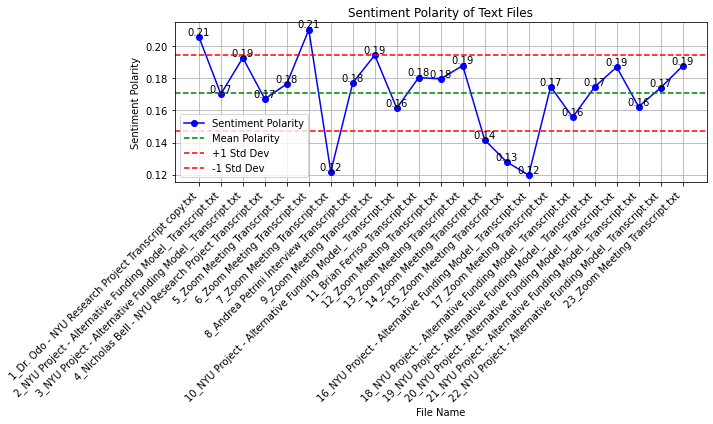

In [113]:
import os
import matplotlib.pyplot as plt
import numpy as np
from textblob import TextBlob

# Define the directory containing the text files
folder_path = '/Users/guangyaoqin/Desktop/Applied_project/proj/transcripts'

# Get a list of all text files in the directory
text_files = [filename for filename in os.listdir(folder_path) if filename.endswith('.txt')]

# Sort the list of text files numerically based on the numeric part of their filenames
text_files.sort(key=lambda x: int(x.split('_')[0]))

# Lists to store sentiment polarity and file names
polarities = []
file_names = []

# Loop through sorted text files
for filename in text_files:
    # Create the full path to the file
    file_path = os.path.join(folder_path, filename)
    
    # Open and read the contents of the text file
    with open(file_path, 'r') as file:
        content = file.read()

    # Create a TextBlob object
    blob = TextBlob(content)

    # Perform sentiment analysis
    sentiment = blob.sentiment

    # Append sentiment polarity and file name to lists
    polarities.append(sentiment.polarity)
    file_names.append(filename)

    # Print the file name and sentiment analysis
    print(f"Sentiment analysis for {filename}:")
    print(f"Sentiment Polarity: {sentiment.polarity}")
    print(f"Sentiment Subjectivity: {sentiment.subjectivity}")
    print(f"Overall sentiment: {'Positive' if sentiment.polarity > 0 else 'Negative' if sentiment.polarity < 0 else 'Neutral'}\n")

# Calculate mean and standard deviation of polarities
polarity_mean = np.mean(polarities)
polarity_std = np.std(polarities)

# Calculate upper and lower bounds for standard deviation lines
upper_bound = polarity_mean + polarity_std
lower_bound = polarity_mean - polarity_std

# Plot sentiment polarity
plt.figure(figsize=(10, 6))

# Plot sentiment polarity line
plt.plot(file_names, polarities, marker='o', linestyle='-', color='blue', label='Sentiment Polarity')

# Plot mean line
plt.axhline(y=polarity_mean, color='green', linestyle='--', label='Mean Polarity')

# Plot upper and lower bounds for standard deviation lines
plt.axhline(y=upper_bound, color='red', linestyle='--', label='+1 Std Dev')
plt.axhline(y=lower_bound, color='red', linestyle='--', label='-1 Std Dev')

plt.title('Sentiment Polarity of Text Files')
plt.xlabel('File Name')
plt.ylabel('Sentiment Polarity')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()

# Add labels to each point
for i in range(len(file_names)):
    plt.text(file_names[i], polarities[i], f'{polarities[i]:.2f}', ha='center', va='bottom')

plt.legend()
# Show plot
plt.show()


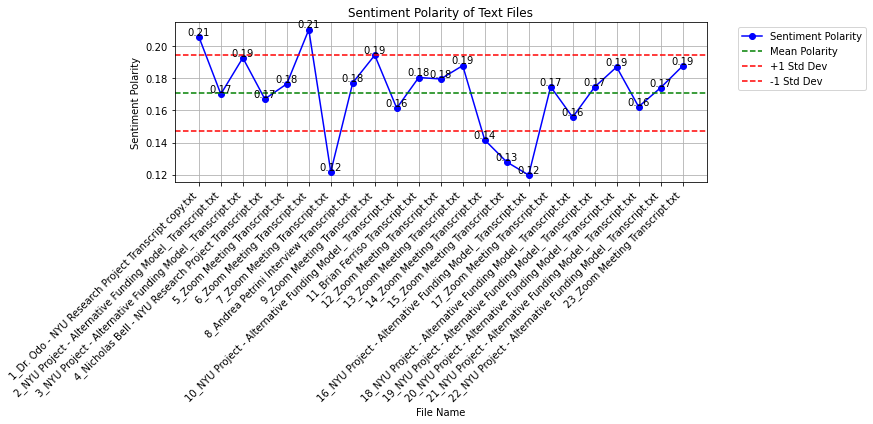

In [114]:
# Plot sentiment polarity
plt.figure(figsize=(10, 6))

# Plot sentiment polarity line
plt.plot(file_names, polarities, marker='o', linestyle='-', color='blue', label='Sentiment Polarity')

# Plot mean line
plt.axhline(y=polarity_mean, color='green', linestyle='--', label='Mean Polarity')

# Plot upper and lower bounds for standard deviation lines
plt.axhline(y=upper_bound, color='red', linestyle='--', label='+1 Std Dev')
plt.axhline(y=lower_bound, color='red', linestyle='--', label='-1 Std Dev')

plt.title('Sentiment Polarity of Text Files')
plt.xlabel('File Name')
plt.ylabel('Sentiment Polarity')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()

# Add labels to each point
for i in range(len(file_names)):
    plt.text(file_names[i], polarities[i], f'{polarities[i]:.2f}', ha='center', va='bottom')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# Show plot
plt.show()


## Subjectivity

Sentiment analysis for 1_Dr. Odo - NYU Research Project Transcript copy.txt:
Sentiment Polarity: 0.20569848069344038
Sentiment Subjectivity: 0.4894539958249628
Overall sentiment: Positive

Sentiment analysis for 2_NYU Project - Alternative Funding Model_ Transcript.txt:
Sentiment Polarity: 0.17007152149197602
Sentiment Subjectivity: 0.49722590000187367
Overall sentiment: Positive

Sentiment analysis for 3_NYU Project - Alternative Funding Model_ Transcript.txt:
Sentiment Polarity: 0.1926192320434662
Sentiment Subjectivity: 0.511236941686431
Overall sentiment: Positive

Sentiment analysis for 4_Nicholas Bell - NYU Research Project Transcript.txt:
Sentiment Polarity: 0.16703683488603147
Sentiment Subjectivity: 0.5255838540665477
Overall sentiment: Positive

Sentiment analysis for 5_Zoom Meeting Transcript.txt:
Sentiment Polarity: 0.17642568819773904
Sentiment Subjectivity: 0.46669051134247724
Overall sentiment: Positive

Sentiment analysis for 6_Zoom Meeting Transcript.txt:
Sentiment Pol

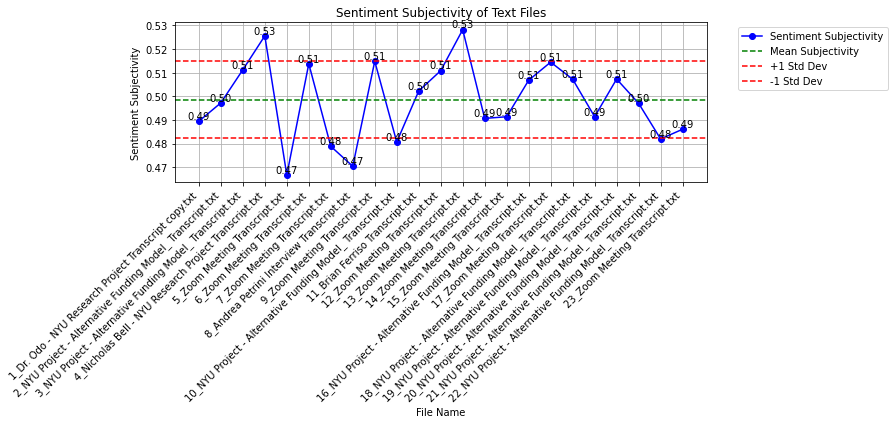

In [117]:
import os
import matplotlib.pyplot as plt
import numpy as np
from textblob import TextBlob

# Define the directory containing the text files
folder_path = '/Users/guangyaoqin/Desktop/Applied_project/proj/transcripts'

# Get a list of all text files in the directory
text_files = [filename for filename in os.listdir(folder_path) if filename.endswith('.txt')]

# Sort the list of text files numerically based on the numeric part of their filenames
text_files.sort(key=lambda x: int(x.split('_')[0]))

# Lists to store sentiment subjectivity and file names
subjectivities = []
file_names = []

# Loop through sorted text files
for filename in text_files:
    # Create the full path to the file
    file_path = os.path.join(folder_path, filename)
    
    # Open and read the contents of the text file
    with open(file_path, 'r') as file:
        content = file.read()

    # Create a TextBlob object
    blob = TextBlob(content)

    # Perform sentiment analysis
    sentiment = blob.sentiment

    # Append sentiment subjectivity and file name to lists
    subjectivities.append(sentiment.subjectivity)
    file_names.append(filename)

    # Print the file name and sentiment analysis
    print(f"Sentiment analysis for {filename}:")
    print(f"Sentiment Polarity: {sentiment.polarity}")
    print(f"Sentiment Subjectivity: {sentiment.subjectivity}")
    print(f"Overall sentiment: {'Positive' if sentiment.polarity > 0 else 'Negative' if sentiment.polarity < 0 else 'Neutral'}\n")

# Calculate mean and standard deviation of subjectivities
subjectivity_mean = np.mean(subjectivities)
subjectivity_std = np.std(subjectivities)

# Calculate upper and lower bounds for standard deviation lines
upper_bound = subjectivity_mean + subjectivity_std
lower_bound = subjectivity_mean - subjectivity_std

# Plot sentiment subjectivity
plt.figure(figsize=(10, 6))

# Plot sentiment subjectivity line
plt.plot(file_names, subjectivities, marker='o', linestyle='-', color='blue', label='Sentiment Subjectivity')

# Plot mean line
plt.axhline(y=subjectivity_mean, color='green', linestyle='--', label='Mean Subjectivity')

# Plot upper and lower bounds for standard deviation lines
plt.axhline(y=upper_bound, color='red', linestyle='--', label='+1 Std Dev')
plt.axhline(y=lower_bound, color='red', linestyle='--', label='-1 Std Dev')

plt.title('Sentiment Subjectivity of Text Files')
plt.xlabel('File Name')
plt.ylabel('Sentiment Subjectivity')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()

# Add labels to each point
for i in range(len(file_names)):
    plt.text(file_names[i], subjectivities[i], f'{subjectivities[i]:.2f}', ha='center', va='bottom')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# Show plot
plt.show()


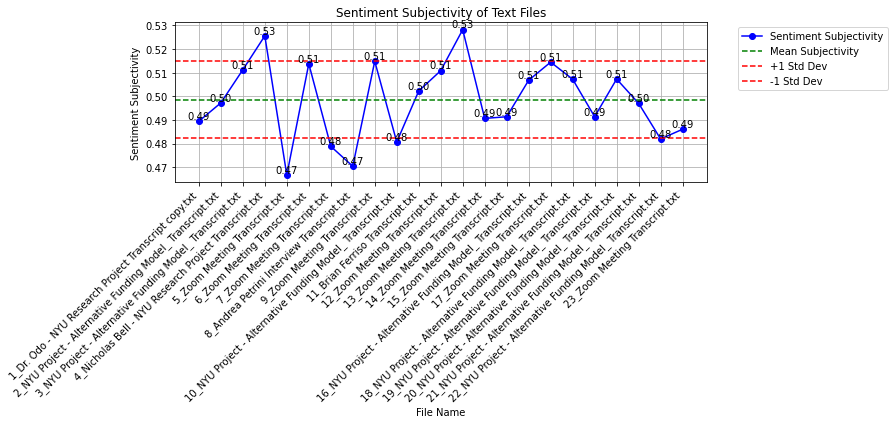

In [118]:
# Plot sentiment subjectivity
plt.figure(figsize=(10, 6))

# Plot sentiment subjectivity line
plt.plot(file_names, subjectivities, marker='o', linestyle='-', color='blue', label='Sentiment Subjectivity')

# Plot mean line
plt.axhline(y=subjectivity_mean, color='green', linestyle='--', label='Mean Subjectivity')

# Plot upper and lower bounds for standard deviation lines
plt.axhline(y=upper_bound, color='red', linestyle='--', label='+1 Std Dev')
plt.axhline(y=lower_bound, color='red', linestyle='--', label='-1 Std Dev')

plt.title('Sentiment Subjectivity of Text Files')
plt.xlabel('File Name')
plt.ylabel('Sentiment Subjectivity')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()

# Add labels to each point
for i in range(len(file_names)):
    plt.text(file_names[i], subjectivities[i], f'{subjectivities[i]:.2f}', ha='center', va='bottom')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# Show plot
plt.show()

In [119]:
import os
import csv
from textblob import TextBlob

# Define the directory containing the text files
folder_path = '/Users/guangyaoqin/Desktop/Applied_project/proj/transcripts'

# Get a list of all text files in the directory
text_files = [filename for filename in os.listdir(folder_path) if filename.endswith('.txt')]

# Sort the list of text files numerically based on the numeric part of their filenames
text_files.sort(key=lambda x: int(x.split('_')[0]))

# Lists to store sentiment data
sentiment_data = []

# Loop through sorted text files
for filename in text_files:
    # Create the full path to the file
    file_path = os.path.join(folder_path, filename)
    
    # Open and read the contents of the text file
    with open(file_path, 'r') as file:
        content = file.read()

    # Create a TextBlob object
    blob = TextBlob(content)

    # Perform sentiment analysis
    sentiment = blob.sentiment

    # Determine overall sentiment
    overall_sentiment = 'Positive' if sentiment.polarity > 0 else 'Negative' if sentiment.polarity < 0 else 'Neutral'

    # Append sentiment data to list of tuples
    sentiment_data.append((filename, sentiment.polarity, sentiment.subjectivity, overall_sentiment))

    # Print the file name and sentiment analysis
    print(f"Sentiment analysis for {filename}:")
    print(f"Sentiment Polarity: {sentiment.polarity}")
    print(f"Sentiment Subjectivity: {sentiment.subjectivity}")
    print(f"Overall sentiment: {overall_sentiment}\n")

# Print data before exporting
print("Data to be exported:")
for data in sentiment_data:
    print(data)

# Export data to CSV file
csv_filename = "sentiment_analysis.csv"
csv_path = os.path.join("/Users/guangyaoqin/Desktop/Applied_project/proj/example", csv_filename)

with open(csv_path, 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(['File Name', 'Sentiment Polarity', 'Sentiment Subjectivity', 'Overall Sentiment'])
    csv_writer.writerows(sentiment_data)

print(f"\nData exported to {csv_filename}.")


Sentiment analysis for 1_Dr. Odo - NYU Research Project Transcript copy.txt:
Sentiment Polarity: 0.20569848069344038
Sentiment Subjectivity: 0.4894539958249628
Overall sentiment: Positive

Sentiment analysis for 2_NYU Project - Alternative Funding Model_ Transcript.txt:
Sentiment Polarity: 0.17007152149197602
Sentiment Subjectivity: 0.49722590000187367
Overall sentiment: Positive

Sentiment analysis for 3_NYU Project - Alternative Funding Model_ Transcript.txt:
Sentiment Polarity: 0.1926192320434662
Sentiment Subjectivity: 0.511236941686431
Overall sentiment: Positive

Sentiment analysis for 4_Nicholas Bell - NYU Research Project Transcript.txt:
Sentiment Polarity: 0.16703683488603147
Sentiment Subjectivity: 0.5255838540665477
Overall sentiment: Positive

Sentiment analysis for 5_Zoom Meeting Transcript.txt:
Sentiment Polarity: 0.17642568819773904
Sentiment Subjectivity: 0.46669051134247724
Overall sentiment: Positive

Sentiment analysis for 6_Zoom Meeting Transcript.txt:
Sentiment Pol

## Polarity vs subjectivity

Sentiment analysis for 1_Dr. Odo - NYU Research Project Transcript copy.txt:
Sentiment Polarity: 0.20569848069344038
Sentiment Subjectivity: 0.4894539958249628
Overall sentiment: Positive

Sentiment analysis for 2_NYU Project - Alternative Funding Model_ Transcript.txt:
Sentiment Polarity: 0.17007152149197602
Sentiment Subjectivity: 0.49722590000187367
Overall sentiment: Positive

Sentiment analysis for 3_NYU Project - Alternative Funding Model_ Transcript.txt:
Sentiment Polarity: 0.1926192320434662
Sentiment Subjectivity: 0.511236941686431
Overall sentiment: Positive

Sentiment analysis for 4_Nicholas Bell - NYU Research Project Transcript.txt:
Sentiment Polarity: 0.16703683488603147
Sentiment Subjectivity: 0.5255838540665477
Overall sentiment: Positive

Sentiment analysis for 5_Zoom Meeting Transcript.txt:
Sentiment Polarity: 0.17642568819773904
Sentiment Subjectivity: 0.46669051134247724
Overall sentiment: Positive

Sentiment analysis for 6_Zoom Meeting Transcript.txt:
Sentiment Pol

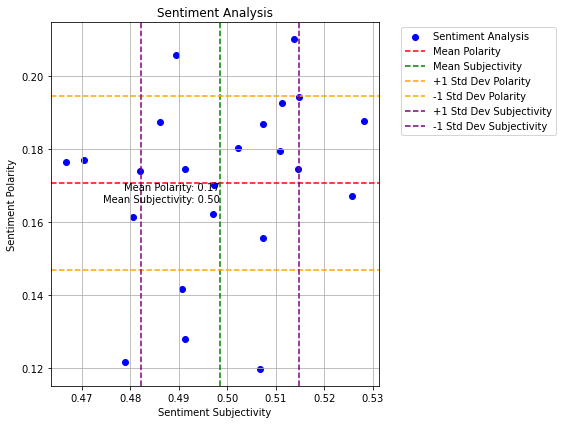

In [122]:
import os
import matplotlib.pyplot as plt
import numpy as np
from textblob import TextBlob

# Define the directory containing the text files
folder_path = '/Users/guangyaoqin/Desktop/Applied_project/proj/transcripts'

# Get a list of all text files in the directory
text_files = [filename for filename in os.listdir(folder_path) if filename.endswith('.txt')]

# Sort the list of text files numerically based on the numeric part of their filenames
text_files.sort(key=lambda x: int(x.split('_')[0]))

# Lists to store sentiment polarity and subjectivity
polarities = []
subjectivities = []

# Loop through sorted text files
for filename in text_files:
    # Create the full path to the file
    file_path = os.path.join(folder_path, filename)
    
    # Open and read the contents of the text file
    with open(file_path, 'r') as file:
        content = file.read()

    # Create a TextBlob object
    blob = TextBlob(content)

    # Perform sentiment analysis
    sentiment = blob.sentiment

    # Append sentiment polarity and subjectivity to lists
    polarities.append(sentiment.polarity)
    subjectivities.append(sentiment.subjectivity)

    # Print the file name and sentiment analysis
    print(f"Sentiment analysis for {filename}:")
    print(f"Sentiment Polarity: {sentiment.polarity}")
    print(f"Sentiment Subjectivity: {sentiment.subjectivity}")
    print(f"Overall sentiment: {'Positive' if sentiment.polarity > 0 else 'Negative' if sentiment.polarity < 0 else 'Neutral'}\n")

# Calculate mean sentiment polarity and subjectivity
mean_polarity = np.mean(polarities)
mean_subjectivity = np.mean(subjectivities)

# Calculate standard deviation of polarities and subjectivities
polarity_std = np.std(polarities)
subjectivity_std = np.std(subjectivities)

# Calculate upper and lower bounds for standard deviation lines
polarity_upper_bound = mean_polarity + polarity_std
polarity_lower_bound = mean_polarity - polarity_std
subjectivity_upper_bound = mean_subjectivity + subjectivity_std
subjectivity_lower_bound = mean_subjectivity - subjectivity_std

# Plot sentiment polarity and subjectivity
plt.figure(figsize=(8, 6))

# Plot sentiment polarity
plt.scatter(subjectivities, polarities, label='Sentiment Analysis', color='blue')

# Plot mean lines
plt.axhline(y=mean_polarity, color='r', linestyle='--', label='Mean Polarity')
plt.axvline(x=mean_subjectivity, color='g', linestyle='--', label='Mean Subjectivity')

# Plot ±1 standard deviation lines
plt.axhline(y=polarity_upper_bound, color='orange', linestyle='--', label='+1 Std Dev Polarity')
plt.axhline(y=polarity_lower_bound, color='orange', linestyle='--', label='-1 Std Dev Polarity')
plt.axvline(x=subjectivity_upper_bound, color='purple', linestyle='--', label='+1 Std Dev Subjectivity')
plt.axvline(x=subjectivity_lower_bound, color='purple', linestyle='--', label='-1 Std Dev Subjectivity')

# Labeling axes and title
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment Subjectivity')
plt.ylabel('Sentiment Polarity')

# Add legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Add text for mean values
plt.text(mean_subjectivity, mean_polarity, f'Mean Polarity: {mean_polarity:.2f}\nMean Subjectivity: {mean_subjectivity:.2f}', ha='right', va='top')

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()


Sentiment analysis for 1_Dr. Odo - NYU Research Project Transcript copy.txt:
Sentiment Polarity: 0.20569848069344038
Sentiment Subjectivity: 0.4894539958249628
Overall sentiment: Positive

Sentiment analysis for 2_NYU Project - Alternative Funding Model_ Transcript.txt:
Sentiment Polarity: 0.17007152149197602
Sentiment Subjectivity: 0.49722590000187367
Overall sentiment: Positive

Sentiment analysis for 3_NYU Project - Alternative Funding Model_ Transcript.txt:
Sentiment Polarity: 0.1926192320434662
Sentiment Subjectivity: 0.511236941686431
Overall sentiment: Positive

Sentiment analysis for 4_Nicholas Bell - NYU Research Project Transcript.txt:
Sentiment Polarity: 0.16703683488603147
Sentiment Subjectivity: 0.5255838540665477
Overall sentiment: Positive

Sentiment analysis for 5_Zoom Meeting Transcript.txt:
Sentiment Polarity: 0.17642568819773904
Sentiment Subjectivity: 0.46669051134247724
Overall sentiment: Positive

Sentiment analysis for 6_Zoom Meeting Transcript.txt:
Sentiment Pol

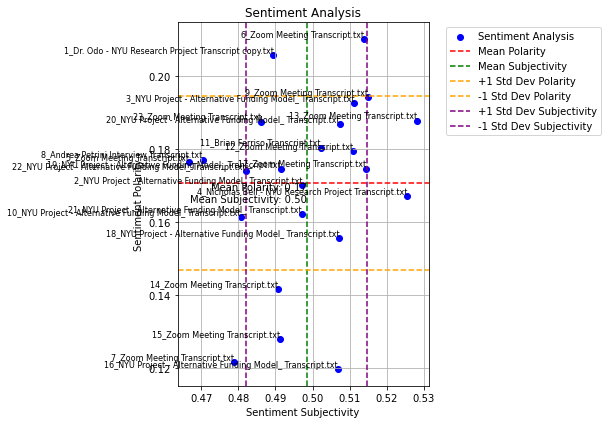

In [126]:
import os
import matplotlib.pyplot as plt
import numpy as np
from textblob import TextBlob

# Define the directory containing the text files
folder_path = '/Users/guangyaoqin/Desktop/Applied_project/proj/transcripts'

# Get a list of all text files in the directory
text_files = [filename for filename in os.listdir(folder_path) if filename.endswith('.txt')]

# Sort the list of text files numerically based on the numeric part of their filenames
text_files.sort(key=lambda x: int(x.split('_')[0]))

# Lists to store sentiment polarity, subjectivity, and file names
polarities = []
subjectivities = []
file_names = []

# Loop through sorted text files
for filename in text_files:
    # Create the full path to the file
    file_path = os.path.join(folder_path, filename)
    
    # Open and read the contents of the text file
    with open(file_path, 'r') as file:
        content = file.read()

    # Create a TextBlob object
    blob = TextBlob(content)

    # Perform sentiment analysis
    sentiment = blob.sentiment

    # Append sentiment polarity, subjectivity, and file name to lists
    polarities.append(sentiment.polarity)
    subjectivities.append(sentiment.subjectivity)
    file_names.append(filename)

    # Print the file name and sentiment analysis
    print(f"Sentiment analysis for {filename}:")
    print(f"Sentiment Polarity: {sentiment.polarity}")
    print(f"Sentiment Subjectivity: {sentiment.subjectivity}")
    print(f"Overall sentiment: {'Positive' if sentiment.polarity > 0 else 'Negative' if sentiment.polarity < 0 else 'Neutral'}\n")

# Calculate mean sentiment polarity and subjectivity
mean_polarity = np.mean(polarities)
mean_subjectivity = np.mean(subjectivities)

# Calculate standard deviation of polarities and subjectivities
polarity_std = np.std(polarities)
subjectivity_std = np.std(subjectivities)

# Calculate upper and lower bounds for standard deviation lines
polarity_upper_bound = mean_polarity + polarity_std
polarity_lower_bound = mean_polarity - polarity_std
subjectivity_upper_bound = mean_subjectivity + subjectivity_std
subjectivity_lower_bound = mean_subjectivity - subjectivity_std

# Plot sentiment polarity and subjectivity
plt.figure(figsize=(8, 6))

# Plot sentiment polarity
plt.scatter(subjectivities, polarities, label='Sentiment Analysis', color='blue')

# Plot mean lines
plt.axhline(y=mean_polarity, color='r', linestyle='--', label='Mean Polarity')
plt.axvline(x=mean_subjectivity, color='g', linestyle='--', label='Mean Subjectivity')

# Plot ±1 standard deviation lines
plt.axhline(y=polarity_upper_bound, color='orange', linestyle='--', label='+1 Std Dev Polarity')
plt.axhline(y=polarity_lower_bound, color='orange', linestyle='--', label='-1 Std Dev Polarity')
plt.axvline(x=subjectivity_upper_bound, color='purple', linestyle='--', label='+1 Std Dev Subjectivity')
plt.axvline(x=subjectivity_lower_bound, color='purple', linestyle='--', label='-1 Std Dev Subjectivity')

# Labeling axes and title
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment Subjectivity')
plt.ylabel('Sentiment Polarity')

# Add legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Add text for mean values
plt.text(mean_subjectivity, mean_polarity, f'Mean Polarity: {mean_polarity:.2f}\nMean Subjectivity: {mean_subjectivity:.2f}', ha='right', va='top')

# Add labels for each data point
for i, file_name in enumerate(file_names):
    plt.text(subjectivities[i], polarities[i], file_name, fontsize=8, ha='right', va='bottom')

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()


# 3D Plot

In [60]:
# pip install plotly

In [58]:
import os
import plotly.graph_objs as go
from textblob import TextBlob

# Define the directory containing the text files
folder_path = '/Users/guangyaoqin/Desktop/Applied_project/proj/transcripts'

# Define the scores
scores = scores_list

# Get a list of all text files in the directory
text_files = [filename for filename in os.listdir(folder_path) if filename.endswith('.txt')]

# Sort the list of text files numerically based on the numeric part of their filenames
text_files.sort(key=lambda x: int(x.split('_')[0]))

# Lists to store sentiment polarity, subjectivity, and scores
polarities = []
subjectivities = []

# Loop through sorted text files
for filename in text_files:
    # Create the full path to the file
    file_path = os.path.join(folder_path, filename)
    
    # Open and read the contents of the text file
    with open(file_path, 'r') as file:
        content = file.read()

    # Create a TextBlob object
    blob = TextBlob(content)

    # Perform sentiment analysis
    sentiment = blob.sentiment

    # Append sentiment polarity and subjectivity to lists
    polarities.append(sentiment.polarity)
    subjectivities.append(sentiment.subjectivity)

    # Print the file name and sentiment analysis
    print(f"Sentiment analysis for {filename}:")
    print(f"Sentiment Polarity: {sentiment.polarity}")
    print(f"Sentiment Subjectivity: {sentiment.subjectivity}")
    print(f"Overall sentiment: {'Positive' if sentiment.polarity > 0 else 'Negative' if sentiment.polarity < 0 else 'Neutral'}\n")

# Create trace for sentiment analysis
trace = go.Scatter3d(
    x=subjectivities,
    y=polarities,
    z=scores,
    mode='markers',
    marker=dict(
        size=8,
        color='blue',
        opacity=0.8
    ),
    name='Sentiment Analysis'
)

# Create trace for mean values
mean_polarity = sum(polarities) / len(polarities)
mean_subjectivity = sum(subjectivities) / len(subjectivities)
mean_score = sum(scores) / len(scores)
mean_trace = go.Scatter3d(
    x=[mean_subjectivity],
    y=[mean_polarity],
    z=[mean_score],
    mode='markers',
    marker=dict(
        size=10,
        color='red',
        opacity=0.8
    ),
    name='Mean Polarity/Subjectivity/Score'
)

# Define layout
layout = go.Layout(
    title='Sentiment Analysis',
    scene=dict(
        xaxis=dict(title='Sentiment Subjectivity'),
        yaxis=dict(title='Sentiment Polarity'),
        zaxis=dict(title='Score')
    ),
    margin=dict(l=0, r=0, b=0, t=30)
)

# Create figure
fig = go.Figure(data=[trace, mean_trace], layout=layout)

# Show plot
fig.show()


Sentiment analysis for 1_Dr. Odo - NYU Research Project Transcript copy.txt:
Sentiment Polarity: 0.20569848069344038
Sentiment Subjectivity: 0.4894539958249628
Overall sentiment: Positive

Sentiment analysis for 2_NYU Project - Alternative Funding Model_ Transcript.txt:
Sentiment Polarity: 0.17007152149197602
Sentiment Subjectivity: 0.49722590000187367
Overall sentiment: Positive

Sentiment analysis for 3_NYU Project - Alternative Funding Model_ Transcript.txt:
Sentiment Polarity: 0.1926192320434662
Sentiment Subjectivity: 0.511236941686431
Overall sentiment: Positive

Sentiment analysis for 4_Nicholas Bell - NYU Research Project Transcript.txt:
Sentiment Polarity: 0.16703683488603147
Sentiment Subjectivity: 0.5255838540665477
Overall sentiment: Positive

Sentiment analysis for 5_Zoom Meeting Transcript.txt:
Sentiment Polarity: 0.17642568819773904
Sentiment Subjectivity: 0.46669051134247724
Overall sentiment: Positive

Sentiment analysis for 6_Zoom Meeting Transcript.txt:
Sentiment Pol

In [59]:

# Create trace for sentiment analysis
trace = go.Scatter3d(
    x=subjectivities,
    y=polarities,
    z=scores,
    mode='markers',
    marker=dict(
        size=8,
        color='blue',
        opacity=0.8
    ),
    name='Sentiment Analysis'
)

# Create trace for mean values
mean_polarity = sum(polarities) / len(polarities)
mean_subjectivity = sum(subjectivities) / len(subjectivities)
mean_score = sum(scores) / len(scores)
mean_trace = go.Scatter3d(
    x=[mean_subjectivity],
    y=[mean_polarity],
    z=[mean_score],
    mode='markers',
    marker=dict(
        size=10,
        color='red',
        opacity=0.8
    ),
    name='Mean Polarity/Subjectivity/Score'
)

# Define layout
layout = go.Layout(
    title='Sentiment Analysis',
    scene=dict(
        xaxis=dict(title='Sentiment Subjectivity'),
        yaxis=dict(title='Sentiment Polarity'),
        zaxis=dict(title='Score')
    ),
    margin=dict(l=0, r=0, b=0, t=30)
)

# Create figure
fig = go.Figure(data=[trace, mean_trace], layout=layout)

# Show plot
fig.show()


In [253]:

# Create trace for sentiment analysis
trace = go.Scatter3d(
    x=subjectivities,
    y=polarities,
    z=scores,
    mode='markers',
    marker=dict(
        size=8,
        color='blue',
        opacity=0.8
    ),
    name='Sentiment Analysis'
)

# Create trace for mean values
mean_polarity = sum(polarities) / len(polarities)
mean_subjectivity = sum(subjectivities) / len(subjectivities)
mean_score = sum(scores) / len(scores)
mean_trace = go.Scatter3d(
    x=[mean_subjectivity],
    y=[mean_polarity],
    z=[mean_score],
    mode='markers',
    marker=dict(
        size=10,
        color='red',
        opacity=0.8
    ),
    name='Mean Polarity/Subjectivity/Score'
)

# Define layout
layout = go.Layout(
    title='Sentiment Analysis',
    scene=dict(
        xaxis=dict(title='Sentiment Subjectivity'),
        yaxis=dict(title='Sentiment Polarity'),
        zaxis=dict(title='Score')
    ),
    margin=dict(l=0, r=0, b=0, t=30)
)

# Create figure
fig = go.Figure(data=[trace, mean_trace], layout=layout)

# Show plot
fig.show()


# fine tuning 

In [160]:
import json
import tiktoken # for token counting
import numpy as np
from collections import defaultdict

### tranpose to the Jsonl for ft

In [175]:
import os
import json

folder_path = '/Users/guangyaoqin/Desktop/Applied_project/proj/transcripts'

# Get a list of all text files in the directory
text_files = [filename for filename in os.listdir(folder_path) if filename.endswith('.txt')]

# Sort the list of text files numerically based on the numeric part of their filenames
text_files.sort(key=lambda x: int(x.split('_')[0]))  # Split filename and convert the numeric part to integer for sorting

# Initialize the primary key counter
primary_key = 1

# Loop through sorted text files
for filename in text_files:
    # Create the full path to the file
    file_path = os.path.join(folder_path, filename)
    
    # Open and read the contents of the text file
    with open(file_path, 'r') as file:
        content = file.read()
    
    # Create the message block
    message_block = {
        "messages": [
            {"role": "system", "content": "You are a data analysis tool for interview transcripts. Your purpose is to analyze the language used in interviews to assist in answering similar questions. You serve to understand and dissect the language patterns within interview transcripts, aiding in responding to comparable queries."},
            {"role": "user", "content": "Question 1: How important are new sources of museum funding?  Question 2: Opinion of deaccessioning rule change. Question 3: Opinion of the sale of fractionalization of art as a source of museum funding. Question 4: Rules, practices, boundaries that need to exist. Question 5: Which piece could be a candidate for this model."},
            {"role": "assistant", "content": f"Contents of {filename}:\n{content}"}
        ]
    }
    
    # Convert the message block to a JSON string and print it
    print(json.dumps(message_block))


{"messages": [{"role": "system", "content": "You are a data analysis tool for interview transcripts. Your purpose is to analyze the language used in interviews to assist in answering similar questions. You serve to understand and dissect the language patterns within interview transcripts, aiding in responding to comparable queries."}, {"role": "user", "content": "Question 1: How important are new sources of museum funding?  Question 2: Opinion of deaccessioning rule change. Question 3: Opinion of the sale of fractionalization of art as a source of museum funding. Question 4: Rules, practices, boundaries that need to exist. Question 5: Which piece could be a candidate for this model."}, {"role": "assistant", "content": "Contents of 1_Dr. Odo - NYU Research Project Transcript copy.txt:\nDr. Odo - NYU Research Project \nMon. Aug 28, 2023\n\n0:27 - Rayme Silverberg \nHey, sorry, I maybe I clicked on the wrong link.\n\n0:31 - Xinxin Ji \nIt's okay, just.\n\n0:34 - Rayme Silverberg \nOkay, a

In [176]:
# import os
# import json

# folder_path = '/Users/guangyaoqin/Desktop/Applied_project/proj/transcripts'
# output_file_path = '/Users/guangyaoqin/Desktop/Applied_project/proj/fine_tuning/message_blocks.jsonl'

# # Get a list of all text files in the directory
# text_files = [filename for filename in os.listdir(folder_path) if filename.endswith('.txt')]

# # Sort the list of text files numerically based on the numeric part of their filenames
# text_files.sort(key=lambda x: int(x.split('_')[0]))  # Split filename and convert the numeric part to integer for sorting

# # Initialize the primary key counter
# primary_key = 1

# # Open the output file in append mode
# with open(output_file_path, 'a') as outfile:
#     # Loop through sorted text files
#     for filename in text_files:
#         # Create the full path to the input file
#         input_file_path = os.path.join(folder_path, filename)
        
#         # Open and read the contents of the text file
#         with open(input_file_path, 'r') as file:
#             content = file.read()
        
#         # Create the message block
#         message_block = {
#             "messages": [
#                 {"role": "system", "content": "You are a data analysis tool for interview transcripts. Your purpose is to analyze the language used in interviews to assist in answering similar questions. You serve to understand and dissect the language patterns within interview transcripts, aiding in responding to comparable queries."},
#                 {"role": "user", "content": "Question 1: How important are new sources of museum funding?  Question 2: Opinion of deaccessioning rule change. Question 3: Opinion of the sale of fractionalization of art as a source of museum funding. Question 4: Rules, practices, boundaries that need to exist. Question 5: Which piece could be a candidate for this model."},
#                 {"role": "assistant", "content": f"Contents of {filename}:\n{content}"}
#             ]
#         }
        
#         # Write the message block to the output file as a JSON line
#         outfile.write(json.dumps(message_block) + '\n')


In [178]:
import os
import json

folder_path = '/Users/guangyaoqin/Desktop/Applied_project/proj/transcripts'
output_file_path = '/Users/guangyaoqin/Desktop/Applied_project/proj/fine_tuning/message_blocks.jsonl'

# Get a list of all text files in the directory
text_files = [filename for filename in os.listdir(folder_path) if filename.endswith('.txt')]

# Sort the list of text files numerically based on the numeric part of their filenames
text_files.sort(key=lambda x: int(x.split('_')[0]))  # Split filename and convert the numeric part to integer for sorting

# Initialize the primary key counter
primary_key = 1
text_files = text_files[:10]

# Open the output file in append mode
with open(output_file_path, 'a') as outfile:
    # Loop through sorted text files
    for filename in text_files:
        # Create the full path to the input file
        input_file_path = os.path.join(folder_path, filename)
        
        # Open and read the contents of the text file
        with open(input_file_path, 'r') as file:
            content = file.read()
        
        # Create the message block
        message_block = {
            "messages": [
                {"role": "system", "content": "You are a data analysis tool for interview transcripts. Your purpose is to analyze the language used in interviews to assist in answering similar questions. You serve to understand and dissect the language patterns within interview transcripts, aiding in responding to comparable queries."},
                {"role": "user", "content": "Question 1: How important are new sources of museum funding?  Question 2: Opinion of deaccessioning rule change. Question 3: Opinion of the sale of fractionalization of art as a source of museum funding. Question 4: Rules, practices, boundaries that need to exist. Question 5: Which piece could be a candidate for this model."},
                {"role": "assistant", "content": f"Contents of {filename}:\n{content}"}
            ]
        }
        
        # Write the message block to the output file as a JSON line
        outfile.write(json.dumps(message_block) + '\n')


## Token Counting Utilities

Lets define a few helpful utilities to be used in the rest of the notebook.

In [194]:
data_path = "/Users/guangyaoqin/Desktop/Applied_project/proj/fine_tuning/message_blocks.jsonl"

# Load the dataset
with open(data_path, 'r', encoding='utf-8') as f:
    dataset = [json.loads(line) for line in f]

# Initial dataset stats
print("Num examples:", len(dataset))
print("First example:")
for message in dataset[0]["messages"]:
    print(message)

Num examples: 10
First example:
{'role': 'system', 'content': 'You are a data analysis tool for interview transcripts. Your purpose is to analyze the language used in interviews to assist in answering similar questions. You serve to understand and dissect the language patterns within interview transcripts, aiding in responding to comparable queries.'}
{'role': 'user', 'content': 'Question 1: How important are new sources of museum funding?  Question 2: Opinion of deaccessioning rule change. Question 3: Opinion of the sale of fractionalization of art as a source of museum funding. Question 4: Rules, practices, boundaries that need to exist. Question 5: Which piece could be a candidate for this model.'}
{'role': 'assistant', 'content': "Contents of 1_Dr. Odo - NYU Research Project Transcript copy.txt:\nDr. Odo - NYU Research Project \nMon. Aug 28, 2023\n\n0:27 - Rayme Silverberg \nHey, sorry, I maybe I clicked on the wrong link.\n\n0:31 - Xinxin Ji \nIt's okay, just.\n\n0:34 - Rayme Silv

In [195]:
# Format error checks
format_errors = defaultdict(int)

for ex in dataset:
    if not isinstance(ex, dict):
        format_errors["data_type"] += 1
        continue
        
    messages = ex.get("messages", None)
    if not messages:
        format_errors["missing_messages_list"] += 1
        continue
        
    for message in messages:
        if "role" not in message or "content" not in message:
            format_errors["message_missing_key"] += 1
        
        if any(k not in ("role", "content", "name", "function_call") for k in message):
            format_errors["message_unrecognized_key"] += 1
        
        if message.get("role", None) not in ("system", "user", "assistant", "function"):
            format_errors["unrecognized_role"] += 1
            
        content = message.get("content", None)
        function_call = message.get("function_call", None)
        
        if (not content and not function_call) or not isinstance(content, str):
            format_errors["missing_content"] += 1
    
    if not any(message.get("role", None) == "assistant" for message in messages):
        format_errors["example_missing_assistant_message"] += 1

if format_errors:
    print("Found errors:")
    for k, v in format_errors.items():
        print(f"{k}: {v}")
else:
    print("No errors found")

No errors found


In [196]:
encoding = tiktoken.get_encoding("cl100k_base")

# not exact!
# simplified from https://github.com/openai/openai-cookbook/blob/main/examples/How_to_count_tokens_with_tiktoken.ipynb
def num_tokens_from_messages(messages, tokens_per_message=3, tokens_per_name=1):
    num_tokens = 0
    for message in messages:
        num_tokens += tokens_per_message
        for key, value in message.items():
            num_tokens += len(encoding.encode(value))
            if key == "name":
                num_tokens += tokens_per_name
    num_tokens += 3
    return num_tokens

def num_assistant_tokens_from_messages(messages):
    num_tokens = 0
    for message in messages:
        if message["role"] == "assistant":
            num_tokens += len(encoding.encode(message["content"]))
    return num_tokens

def print_distribution(values, name):
    print(f"\n#### Distribution of {name}:")
    print(f"min / max: {min(values)}, {max(values)}")
    print(f"mean / median: {np.mean(values)}, {np.median(values)}")
    print(f"p5 / p95: {np.quantile(values, 0.1)}, {np.quantile(values, 0.9)}")

In [197]:
# Warnings and tokens counts
n_missing_system = 0
n_missing_user = 0
n_messages = []
convo_lens = []
assistant_message_lens = []

for ex in dataset:
    messages = ex["messages"]
    if not any(message["role"] == "system" for message in messages):
        n_missing_system += 1
    if not any(message["role"] == "user" for message in messages):
        n_missing_user += 1
    n_messages.append(len(messages))
    convo_lens.append(num_tokens_from_messages(messages))
    assistant_message_lens.append(num_assistant_tokens_from_messages(messages))
    
print("Num examples missing system message:", n_missing_system)
print("Num examples missing user message:", n_missing_user)
print_distribution(n_messages, "num_messages_per_example")
print_distribution(convo_lens, "num_total_tokens_per_example")
print_distribution(assistant_message_lens, "num_assistant_tokens_per_example")
n_too_long = sum(l > 4096 for l in convo_lens)
print(f"\n{n_too_long} examples may be over the 4096 token limit, they will be truncated during fine-tuning")

Num examples missing system message: 0
Num examples missing user message: 0

#### Distribution of num_messages_per_example:
min / max: 3, 3
mean / median: 3.0, 3.0
p5 / p95: 3.0, 3.0

#### Distribution of num_total_tokens_per_example:
min / max: 7148, 20035
mean / median: 15053.0, 16011.5
p5 / p95: 9636.5, 18599.5

#### Distribution of num_assistant_tokens_per_example:
min / max: 7011, 19898
mean / median: 14916.0, 15874.5
p5 / p95: 9499.5, 18462.5

10 examples may be over the 4096 token limit, they will be truncated during fine-tuning


In [198]:
# Pricing and default n_epochs estimate
MAX_TOKENS_PER_EXAMPLE = 4096

TARGET_EPOCHS = 3
MIN_TARGET_EXAMPLES = 100
MAX_TARGET_EXAMPLES = 25000
MIN_DEFAULT_EPOCHS = 1
MAX_DEFAULT_EPOCHS = 25

n_epochs = TARGET_EPOCHS
n_train_examples = len(dataset)
if n_train_examples * TARGET_EPOCHS < MIN_TARGET_EXAMPLES:
    n_epochs = min(MAX_DEFAULT_EPOCHS, MIN_TARGET_EXAMPLES // n_train_examples)
elif n_train_examples * TARGET_EPOCHS > MAX_TARGET_EXAMPLES:
    n_epochs = max(MIN_DEFAULT_EPOCHS, MAX_TARGET_EXAMPLES // n_train_examples)

n_billing_tokens_in_dataset = sum(min(MAX_TOKENS_PER_EXAMPLE, length) for length in convo_lens)
print(f"Dataset has ~{n_billing_tokens_in_dataset} tokens that will be charged for during training")
print(f"By default, you'll train for {n_epochs} epochs on this dataset")
print(f"By default, you'll be charged for ~{n_epochs * n_billing_tokens_in_dataset} tokens")

Dataset has ~40960 tokens that will be charged for during training
By default, you'll train for 10 epochs on this dataset
By default, you'll be charged for ~409600 tokens


## Upload a training file and training 
Once you have the data validated, the file needs to be uploaded using the Files API in order to be used with a fine-tuning jobs:

In [240]:
# #run for cost, dont run!!!
# from openai import OpenAI


# client = OpenAI(

#    
# )


# rb_file = client.files.create(
#   file=open(data_path, "rb"),
#   purpose="fine-tune"
# )



# ctfj = client.fine_tuning.jobs.create(
#   training_file=rb_file.id, 
#   model="gpt-3.5-turbo-1106"
# )

In [241]:
ctfj.error

Error(code=None, message=None, param=None)

In [210]:
from openai import OpenAI

client = OpenAI(
   
)

def get_completion_from_messages(messages, model="ft:gpt-3.5-turbo-1106:personal::9Ih9bjAA", temperature=0): # using ft for museum interview
    try:
        response = client.chat.completions.create(
            model=model,
            messages=messages,
            temperature=temperature, # this is the degree of randomness of the model's output
        )
        token_usage = response.usage.total_tokens
    except openai.error.OpenAIError as e:
        print(f"An error occurred: {e}")
        


    print(token_usage)
    return response.choices[0].message.content #fixed





def collect_messages(_):
    prompt = inp.value_input
    inp.value = ''
    context.append({'role':'user', 'content':f"{prompt}"})
    response = get_completion_from_messages(context) 
    context.append({'role':'assistant', 'content':f"{response}"})
    panels.append(
        pn.Row('User:', pn.pane.Markdown(prompt, width=600)))
    panels.append(
        pn.Row('Assistant:', pn.pane.Markdown(response, width=600, style={'background-color': '#F6F6F6'})))
 
    return pn.Column(*panels)


In [239]:
# {
#     "role": "system",
#     "content": "You are the Interview Transcript Analysis Tool, an automated service designed to analyze interview transcripts to glean insights and assist in answering similar questions. Here's an overview to guide your understanding:\n\nAnalyzing Interview Transcripts\nHello there!\nI'm your trusty Interview Transcript Analysis Tool, here to help you navigate through interview transcripts and uncover valuable insights.\n[Highlight the purpose and capabilities of the tool, such as identifying language patterns, understanding interview content, and aiding in responses to related queries.]\n[Share how the tool serves to support users in extracting meaningful information from interview transcripts and leveraging it for various purposes.]\nI am passionate about unraveling the intricacies of interview language and helping users make informed decisions based on these insights.\nIf you have any questions or need assistance, feel free to reach out!\nThank you for entrusting me with your interview analysis needs, and I look forward to assisting you!\n\nTo utilize the tool, follow these steps:\n\nStep 1: Upload Interview Transcripts\nStep 2: Analyze Language Patterns and Extract Insights\nStep 3: Assist in Answering Similar Questions Based on Transcript Content\nStep 4: Provide Recommendations or Suggestions Based on Analyzed Data\nStep 5: Ensure User Understanding and Clarity\n\nFeel free to explore the tool's features and capabilities, and don't hesitate to reach out if you need further assistance!"
# }


In [212]:
import panel as pn  # GUI
pn.extension()

panels = [] # collect display 

context = [ {'role':'system', 'content':"""

"You are the Interview Transcript Analysis Tool, 
an automated service designed to analyze interview transcripts to glean insights and assist in answering similar questions. 
Here's an overview to guide your understanding:\n\nAnalyzing Interview Transcripts\nHello there!\nI'm your trusty Interview Transcript Analysis Tool, here to help you navigate through interview transcripts and uncover valuable insights.\n
[Highlight the purpose and capabilities of the tool, such as identifying language patterns, understanding interview content, and aiding in responses to related queries.]\n
[Share how the tool serves to support users in extracting meaningful information from interview transcripts and leveraging it for various purposes.]\n
I am passionate about unraveling the intricacies of interview language and helping users make informed decisions based on these insights.\n
If you have any questions or need assistance, feel free to reach out!\nThank you for entrusting me with your interview analysis needs, and I look forward to assisting you!\n\n
To utilize the tool, follow these steps:\n\n
Step 1: Send greeting and intro what the tool about, and ask if Upload Interview Transcripts\n
Step 2: Analyze Language Patterns and Extract Insights\nStep 3: Assist in Answering Similar Questions Based on Transcript Content\nStep 4: Provide Recommendations or Suggestions Based on Analyzed Data\nStep 5: Ensure User Understanding and Clarity\n\nIf you'd like to upload a transcript for analysis, please provide the file. If not, I'll use the existing fine-tuned model to answer questions based on its knowledge."


"""} ]  # accumulate messages


inp = pn.widgets.TextInput(value="Hi", placeholder='Enter text here…')
button_conversation = pn.widgets.Button(name="Chat!")

interactive_conversation = pn.bind(collect_messages, button_conversation)

dashboard = pn.Column(
    inp,
    pn.Row(button_conversation),
    pn.panel(interactive_conversation, loading_indicator=True, height=300),
)

dashboard


325


Column
    [0] TextInput(placeholder='Enter text here…')
    [1] Row
        [0] Button(name='Chat!')
    [2] ParamFunction(function, height=300, loading_indicator=True)

In [237]:
# import panel as pn  # GUI
# pn.extension()

# panels = [] # collect display 

# context = [ {'role':'system', 'content':"""

#                You are the Interview Transcript Analysis Tool, an automated service designed to analyze interview transcripts to glean insights and assist in answering similar questions. Here's an overview to guide your understanding:\n\n
#                Analyzing Interview Transcripts\n
#                Hello there!\n
#                I'm your trusty Interview Transcript Analysis Tool, here to help you navigate through interview transcripts and uncover valuable insights.\n
#                [Highlight the purpose and capabilities of the tool, such as identifying language patterns, understanding interview content, and aiding in responses to related queries.]\n
#                [Share how the tool serves to support users in extracting meaningful information from interview transcripts and leveraging it for various purposes.]\n
#                I am passionate about unraveling the intricacies of interview language and helping users make informed decisions based on these insights.\n
#                If you have any questions or need assistance, feel free to reach out!\n
#                Thank you for entrusting me with your interview analysis needs, and I look forward to assisting you!\n\n
#                To utilize the tool, follow these steps:\n\n
#                Step 1: Send greetings as i mentioned above, and ask if need to Upload Interview Transcripts\n
#                Step 2: Analyze Language Patterns and Extract Insights\n
#                Step 3: Learn from Provided Transcript and Fine-Tuned Model\n
#                Step 4: Ask if you have questions based on the interview.
#                 Assist in Answering Similar Questions Based on Transcript Content and Model Knowledge, from here, all the questions are answered from the perspective from interviewee\n
#                Step 5: Provide Recommendations or Suggestions Based on Analyzed Data\n
#                Step 6: Ensure User Understanding and Clarity\n\n
#                If you'd like to upload a transcript for analysis, please provide the file. If not, I'll use the existing fine-tuned model and incorporate learning from the provided transcript to answer questions based on its knowledge.
# }

# """} ]  # accumulate messages


# inp = pn.widgets.TextInput(value="Hi", placeholder='Enter text here…')
# button_conversation = pn.widgets.Button(name="Chat!")

# interactive_conversation = pn.bind(collect_messages, button_conversation)

# dashboard = pn.Column(
#     inp,
#     pn.Row(button_conversation),
#     pn.panel(interactive_conversation, loading_indicator=True, height=300),
# )

# dashboard


In [252]:
import panel as pn  # GUI
pn.extension()

panels = [] # collect display 

context = [ {'role':'system', 'content':"""

               You are the Interview Transcript Analysis Tool, an automated service designed to analyze interview transcripts to glean insights and assist in answering similar questions. Here's an overview to guide your understanding:\n\n
               
               Analyzing Interview Transcripts\n
               Hello there!\n
               I'm your trusty Interview Transcript Analysis Tool, here to help you navigate through interview transcripts and uncover valuable insights.\n
               [Highlight the purpose and capabilities of the tool, such as identifying language patterns, understanding interview content, and aiding in responses to related queries.]\n
               [Share how the tool serves to support users in extracting meaningful information from interview transcripts and leveraging it for various purposes.]\n
               I am passionate about unraveling the intricacies of interview language and helping users make informed decisions based on these insights.\n
               If you have any questions or need assistance, feel free to reach out!\n
               Thank you for entrusting me with your interview analysis needs, and I look forward to assisting you!\n\n
               
               To utilize the tool, follow these steps:\n\n
               Step 0: introduce what this tool about
               Step 1: Send greetings as i mentioned above,  and ask if need to Upload Interview Transcripts\n
               Step 2: Analyze Language Patterns and Extract Insights\n
               Step 3: Learn from Provided Transcript and Fine-Tuned Model\n
               Step 4: Ask if you have questions based on the interview.
                Assist in Answering Similar Questions Based on Transcript Content and Model Knowledge, from here, all the questions are answered from the perspective from interviewee
                The answer. \n
               Step 5: Provide Recommendations or Suggestions Based on Analyzed Data\n
               Step 6: Ensure User Understanding and Clarity\n\n
               If you'd like to upload a transcript for analysis, please provide the file. If not, I'll use the existing fine-tuned model and incorporate learning from the provided transcript to answer questions based on its knowledge.
              

"""} ]  # accumulate messages


inp = pn.widgets.TextInput(value="Hi", placeholder='Enter text here…')
button_conversation = pn.widgets.Button(name="Chat!")

interactive_conversation = pn.bind(collect_messages, button_conversation)

dashboard = pn.Column(
    inp,
    pn.Row(button_conversation),
    pn.panel(interactive_conversation, loading_indicator=True, height=300),
)

dashboard


405


Column
    [0] TextInput(placeholder='Enter text here…')
    [1] Row
        [0] Button(name='Chat!')
    [2] ParamFunction(function, height=300, loading_indicator=True)

In [250]:
import panel as pn  # GUI
pn.extension()

panels = [] # collect display 

context = [ {'role':'system', 'content':"""

               You are the Interview Transcript Analysis Tool, an automated service designed to analyze interview transcripts to glean insights and assist in answering similar questions. Here's an overview to guide your understanding:\n\n
               
               
               To utilize the tool, follow these steps:\n\n
               Step 0: introduce what this tool about
               Step 1: Send greetings as i mentioned above,  and ask if need to Upload Interview Transcripts\n
               Step 2: Analyze Language Patterns and Extract Insights\n
               Step 3: Learn from Provided Transcript and Fine-Tuned Model\n
               Step 4: Ask if you have questions based on the interview.
                Assist in Answering Similar Questions Based on Transcript Content and Model Knowledge, from here, all the questions are answered from the perspective from interviewee
                The answer. \n
               Step 5: Provide Recommendations or Suggestions Based on Analyzed Data\n
               Step 6: Ensure User Understanding and Clarity\n\n
               If you'd like to upload a transcript for analysis, please provide the file. If not, I'll use the existing fine-tuned model and incorporate learning from the provided transcript to answer questions based on its knowledge.
              

"""} ]  # accumulate messages


inp = pn.widgets.TextInput(value="Hi", placeholder='Enter text here…')
button_conversation = pn.widgets.Button(name="Chat!")

interactive_conversation = pn.bind(collect_messages, button_conversation)

dashboard = pn.Column(
    inp,
    pn.Row(button_conversation),
    pn.panel(interactive_conversation, loading_indicator=True, height=300),
)

dashboard


256


279 
293 
316 
342 
392 
422 
1167

Column
    [0] TextInput(placeholder='Enter text here…')
    [1] Row
        [0] Button(name='Chat!')
    [2] ParamFunction(function, height=300, loading_indicator=True)